In [63]:
import random

import numpy as np
import matplotlib.pyplot as plt

from sklearn.datasets import fetch_openml
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import BernoulliNB

%matplotlib notebook

In [5]:
data, targets = fetch_openml("mnist_784", version=1, return_X_y=True, as_frame=False)

In [48]:
data_train = data[:60000]
targets_train = targets[:60000]
data_test = data[60000:]
targets_test = targets[60000:]

nbc = BernoulliNB().fit(data_train, targets_train)

<IPython.core.display.Javascript object>


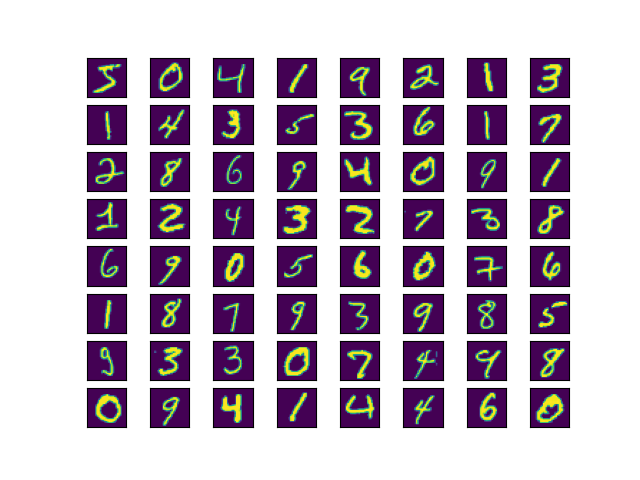

In [56]:
# View Samples
num_rows = 8
num_cols = 8
fig = plt.figure()
for i in range(num_rows):
    for j in range(num_cols):
        idx = i * num_cols + j
        ax = fig.add_subplot(num_rows, num_cols, idx + 1)
        ax.imshow(data_train[idx].reshape((28, 28)))
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

In [82]:
train_acc = nbc.score(data_train, targets_train)
test_acc = nbc.score(data_test, targets_test)
print(f"Training Accuracy = {train_acc}\nTest Accuracy = {test_acc}")

Training Accuracy = 0.83125
Test Accuracy = 0.8413


(10, 784)


/home/alex/anaconda3/envs/cse6363/lib/python3.7/site-packages/sklearn/utils/deprecation.py:103: FutureWarning: Attribute `coef_` was deprecated in version 0.24 and will be removed in 1.1 (renaming of 0.26).
  warnings.warn(msg, category=FutureWarning)


<IPython.core.display.Javascript object>


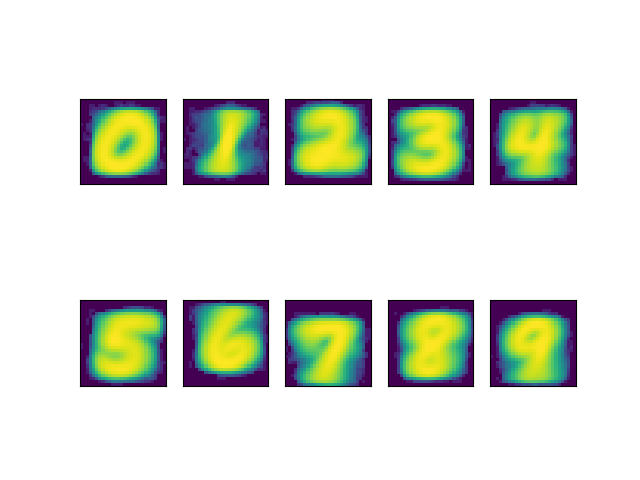

In [83]:
params = nbc.coef_
print(params.shape)

fig = plt.figure()
for i in range(2):
    for j in range(5):
        idx = i * 5 + j
        ax = fig.add_subplot(2, 5, idx + 1)
        ax.imshow(params[idx].reshape((28, 28)))
        ax.xaxis.set_visible(False)
        ax.yaxis.set_visible(False)

<IPython.core.display.Javascript object>


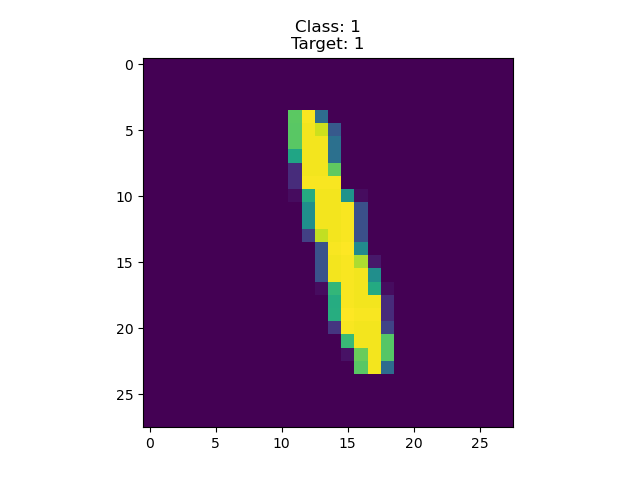

In [81]:
idx = random.randint(0, len(targets_test) - 1)
prediction = nbc.predict(data_test)
label = targets_test[idx]

fig = plt.figure()
ax = fig.add_subplot(111)
ax.imshow(data_test[idx].reshape((28, 28)))
ax.set_title(f"Class: {prediction[idx]}\nTarget: {label}");